In [3]:
import pandas as pd

# Baca dataset (ubah sesuai path)
df = pd.read_csv("data_bersih.csv", delimiter=";")

def label_diabetes(row):
    # Aturan dari labeling.pdf (halaman 2)
    if row['hba1c'] >= 6.5 or row['fgb'] >= 7.0:
        return "Diabetes"
    elif (5.7 <= row['hba1c'] < 6.5) or (5.6 <= row['fgb'] < 6.9):
        return "Prediabetes"
    else:
        return "Non-diabetes"

# Tambah kolom Status
df['Status'] = df.apply(label_diabetes, axis=1)

# Cek distribusi label
print(df['Status'].value_counts())

# Simpan dataset baru (opsional)
df.to_csv("data_labeled.csv", index=False)


Status
Diabetes        3431
Prediabetes     1534
Non-diabetes    1508
Name: count, dtype: int64


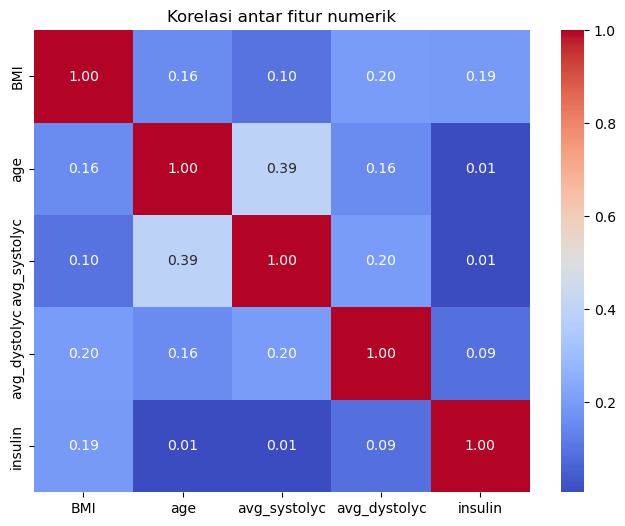

In [4]:
X = df[['BMI', 'age', 'avg_systolyc', 'avg_dystolyc', 'insulin']]
y = df['Status']

import seaborn as sns
import matplotlib.pyplot as plt

features = ['BMI', 'age', 'avg_systolyc', 'avg_dystolyc', 'insulin']

corr_matrix = df[features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antar fitur numerik")
plt.show()


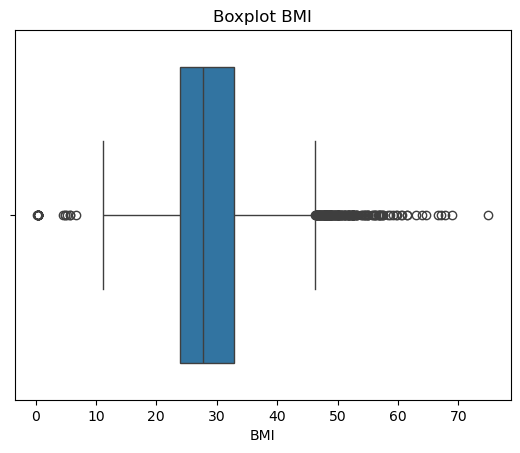

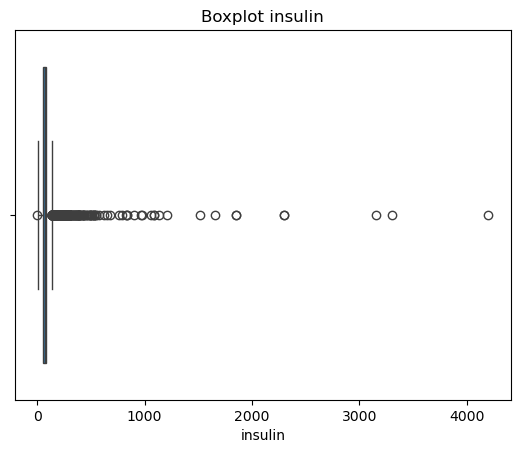

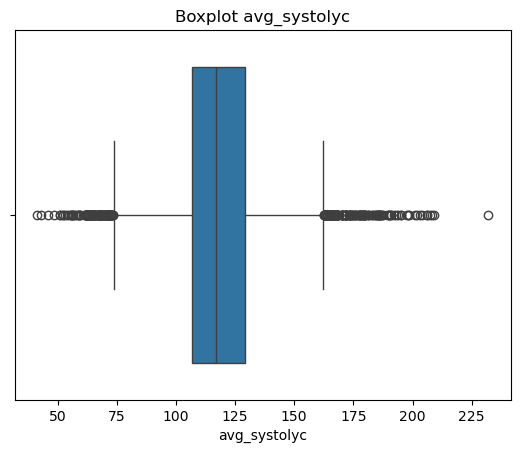

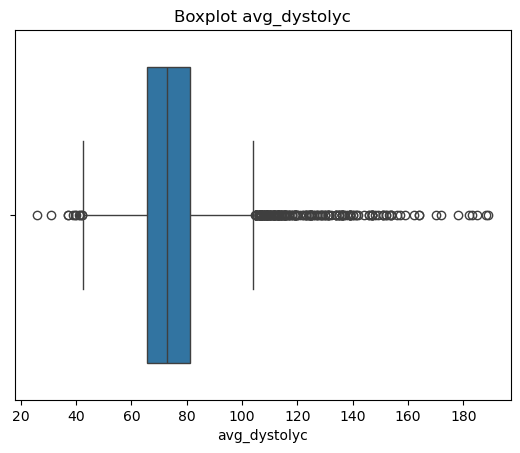

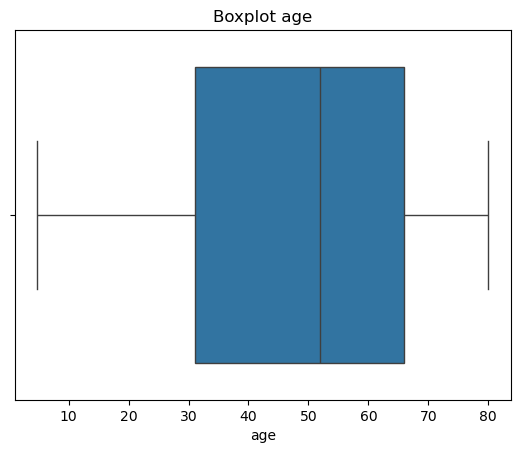

In [10]:
# Boxplot BMI untuk lihat outlier
sns.boxplot(x=df['BMI'])
plt.title("Boxplot BMI")
plt.show()

sns.boxplot(x=df['insulin'])
plt.title("Boxplot insulin")
plt.show()

sns.boxplot(x=df ['avg_systolyc'])
plt.title("Boxplot avg_systolyc")
plt.show()

sns.boxplot(x=df ['avg_dystolyc'])
plt.title("Boxplot avg_dystolyc")
plt.show()

sns.boxplot(x=df ['age'])
plt.title("Boxplot age")
plt.show()
